In [2]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Define comment types
positive_comments = [
    'Love the design!', 'So comfortable', 'Fire emoji', 'Must have!', 'Obsessed!',
    'Amazing sneakers!', 'Can\'t wait to get a pair', 'Perfect for my style',
    'Nike always delivers!', 'These are a game-changer', 'Pure 🔥🔥🔥',
    'Best release of the year', 'So fresh, so clean!', 'My next purchase!',
    'Nike outdid themselves', 'Instant classic!', 'Need these in my life'
]
negative_comments = [
    'Too expensive', 'Shipping is slow', 'Ripped after one wear', 'Not worth the hype',
    'Ugly colorway', 'Poor quality', 'Disappointed with Nike', 'Looks cheap',
    'Rather buy something else', 'Overpriced!', 'Bad fit', 'Expected more',
    'Already falling apart', 'Waste of money', 'Hard pass', 'Another L from Nike'
]
neutral_comments = [
    'When is the release?', 'Does this come in black?', 'Any other color options?',
    'What\'s the price?', 'Where can I buy these?', 'Are they limited edition?',
    'Looks interesting', 'Waiting for reviews', 'Hmm, not sure yet',
    'I\'ll think about it', 'Wonder if they\'re comfortable', 'Need more info'
]

# Number of comments
num_comments = 1000

# Generate User_ID
user_ids = [f'User_{i:04d}' for i in range(1, num_comments + 1)]

# Generate Comments based on distribution
comments = []
num_positive = int(0.40 * num_comments)
num_negative = int(0.30 * num_comments)
num_neutral = num_comments - num_positive - num_negative # Ensure total is 1000

for _ in range(num_positive):
    comments.append(random.choice(positive_comments))
for _ in range(num_negative):
    comments.append(random.choice(negative_comments))
for _ in range(num_neutral):
    comments.append(random.choice(neutral_comments))

random.shuffle(comments) # Shuffle to mix sentiment types

# Generate Likes
likes = np.random.randint(0, 5001, num_comments)

# Generate Dates in Dec 2025
start_date = datetime(2025, 12, 1)
end_date = datetime(2025, 12, 31)
delta = end_date - start_date

dates = [start_date + timedelta(days=random.randint(0, delta.days))
         for _ in range(num_comments)]

# Create DataFrame
df = pd.DataFrame({
    'User_ID': user_ids,
    'Comment': comments,
    'Likes': likes,
    'Date': dates
})

# Display the first 10 rows
display(df.head(10))

# Install TextBlob (if not already installed)
%pip install textblob

# Import TextBlob
from textblob import TextBlob

# Sentiment Scoring
def get_sentiment(comment):
    analysis = TextBlob(comment)
    if analysis.sentiment.polarity > 0.1:
        return 'Positive'
    elif analysis.sentiment.polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Comment'].apply(get_sentiment)

# Issue Tagger
def tag_topic(comment):
    comment = comment.lower() # Convert to lowercase for case-insensitive matching
    if any(keyword in comment for keyword in ['shipping', 'delivery', 'arrive']):
        return 'Logistics'
    elif any(keyword in comment for keyword in ['price', 'expensive', 'cost']):
        return 'Pricing'
    elif any(keyword in comment for keyword in ['quality', 'break', 'rip', 'fabric']):
        return 'Quality'
    else:
        return 'General'

df['Topic'] = df['Comment'].apply(tag_topic)

# Crisis Flag
df['High_Risk'] = (df['Sentiment'] == 'Negative') & (df['Likes'] > 500)

# Display the first 10 rows with requested columns
display(df[['Comment', 'Sentiment', 'Topic', 'High_Risk']].head(10))

,User_ID,Comment,Likes,Date
0,User_0001,Need these in my life,736,2025-12-17
1,User_0002,Best release of the year,1694,2025-12-05
2,User_0003,Where can I buy these?,4703,2025-12-08
3,User_0004,Rather buy something else,4657,2025-12-30
4,User_0005,What's the price?,752,2025-12-24
5,User_0006,Can't wait to get a pair,3091,2025-12-23
6,User_0007,What's the price?,3879,2025-12-29
7,User_0008,Not worth the hype,640,2025-12-28
8,User_0009,Expected more,3014,2025-12-20
9,User_0010,When is the release?,938,2025-12-25


,Comment,Sentiment,Topic,High_Risk
0,Need these in my life,Neutral,General,False
1,Best release of the year,Positive,General,False
2,Where can I buy these?,Neutral,General,False
3,Rather buy something else,Neutral,General,False
4,What's the price?,Neutral,Pricing,False
5,Can't wait to get a pair,Neutral,General,False
6,What's the price?,Neutral,Pricing,False
7,Not worth the hype,Negative,General,True
8,Expected more,Positive,General,False
9,When is the release?,Neutral,General,False


In [4]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Define comment types
positive_comments = [
    'Love the design!', 'So comfortable', 'Fire emoji', 'Must have!', 'Obsessed!',
    'Amazing sneakers!', 'Can\'t wait to get a pair', 'Perfect for my style',
    'Nike always delivers!', 'These are a game-changer', 'Pure 🔥🔥🔥',
    'Best release of the year', 'So fresh, so clean!', 'My next purchase!',
    'Nike outdid themselves', 'Instant classic!', 'Need these in my life'
]
negative_comments = [
    'Too expensive', 'Shipping is slow', 'Ripped after one wear', 'Not worth the hype',
    'Ugly colorway', 'Poor quality', 'Disappointed with Nike', 'Looks cheap',
    'Rather buy something else', 'Overpriced!', 'Bad fit', 'Expected more',
    'Already falling apart', 'Waste of money', 'Hard pass', 'Another L from Nike'
]
neutral_comments = [
    'When is the release?', 'Does this come in black?', 'Any other color options?',
    'What\'s the price?', 'Where can I buy these?', 'Are they limited edition?',
    'Looks interesting', 'Waiting for reviews', 'Hmm, not sure yet',
    'I\'ll think about it', 'Wonder if they\'re comfortable', 'Need more info'
]

# Number of comments
num_comments = 1000

# Generate User_ID
user_ids = [f'User_{i:04d}' for i in range(1, num_comments + 1)]

# Generate Comments based on distribution
comments = []
num_positive = int(0.40 * num_comments)
num_negative = int(0.30 * num_comments)
num_neutral = num_comments - num_positive - num_negative # Ensure total is 1000

for _ in range(num_positive):
    comments.append(random.choice(positive_comments))
for _ in range(num_negative):
    comments.append(random.choice(negative_comments))
for _ in range(num_neutral):
    comments.append(random.choice(neutral_comments))

random.shuffle(comments) # Shuffle to mix sentiment types

# Generate Likes
likes = np.random.randint(0, 5001, num_comments)

# Generate Dates in Dec 2025
start_date = datetime(2025, 12, 1)
end_date = datetime(2025, 12, 31)
delta = end_date - start_date

dates = [start_date + timedelta(days=random.randint(0, delta.days))
         for _ in range(num_comments)]

# Create DataFrame
df = pd.DataFrame({
    'User_ID': user_ids,
    'Comment': comments,
    'Likes': likes,
    'Date': dates
})

# Display the first 10 rows
display(df.head(10))

# Install TextBlob (if not already installed)
%pip install textblob

# Import TextBlob
from textblob import TextBlob

# Sentiment Scoring
def get_sentiment(comment):
    analysis = TextBlob(comment)
    if analysis.sentiment.polarity > 0.1:
        return 'Positive'
    elif analysis.sentiment.polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Comment'].apply(get_sentiment)

# Advanced Topic Tagging
def tag_topic(comment):
    comment = comment.lower() # Convert to lowercase for case-insensitive matching
    if any(keyword in comment for keyword in ['ship', 'delivery', 'arrive', 'late', 'wait', 'stuck', 'order', 'tracking', 'time', 'slow']):
        return 'Shipping/Logistics'
    elif any(keyword in comment for keyword in ['price', 'expensive', 'cost', 'money', 'worth', 'pay', 'dollar', 'overpriced', 'greedy']):
        return 'Pricing/Value'
    elif any(keyword in comment for keyword in ['quality', 'break', 'rip', 'fabric', 'material', 'stitch', 'cheap', 'fake', 'comfort', 'size', 'fit']):
        return 'Quality/Product'
    elif any(keyword in comment for keyword in ['service', 'rude', 'help', 'support', 'email', 'ignore', 'reply', 'staff']):
        return 'Customer Service'
    else:
        return 'General'

df['Topic'] = df['Comment'].apply(tag_topic)

# Viral Risk Flag (previously Crisis Flag)
df['High_Risk'] = (df['Sentiment'] == 'Negative') & (df['Likes'] > 1000)

# Display the first 10 rows with requested columns
display(df[['Comment', 'Sentiment', 'Topic', 'High_Risk']].head(10))

,User_ID,Comment,Likes,Date
0,User_0001,Waste of money,2227,2025-12-22
1,User_0002,Obsessed!,4436,2025-12-02
2,User_0003,Can't wait to get a pair,1086,2025-12-19
3,User_0004,Best release of the year,1263,2025-12-05
4,User_0005,I'll think about it,1479,2025-12-22
5,User_0006,Instant classic!,3528,2025-12-15
6,User_0007,Love the design!,1234,2025-12-12
7,User_0008,When is the release?,2030,2025-12-23
8,User_0009,So comfortable,4348,2025-12-24
9,User_0010,Are they limited edition?,72,2025-12-20


,Comment,Sentiment,Topic,High_Risk
0,Waste of money,Negative,Pricing/Value,True
1,Obsessed!,Negative,General,True
2,Can't wait to get a pair,Neutral,Shipping/Logistics,False
3,Best release of the year,Positive,General,False
4,I'll think about it,Neutral,General,False
5,Instant classic!,Positive,General,False
6,Love the design!,Positive,General,False
7,When is the release?,Neutral,General,False
8,So comfortable,Positive,Quality/Product,False
9,Are they limited edition?,Neutral,General,False


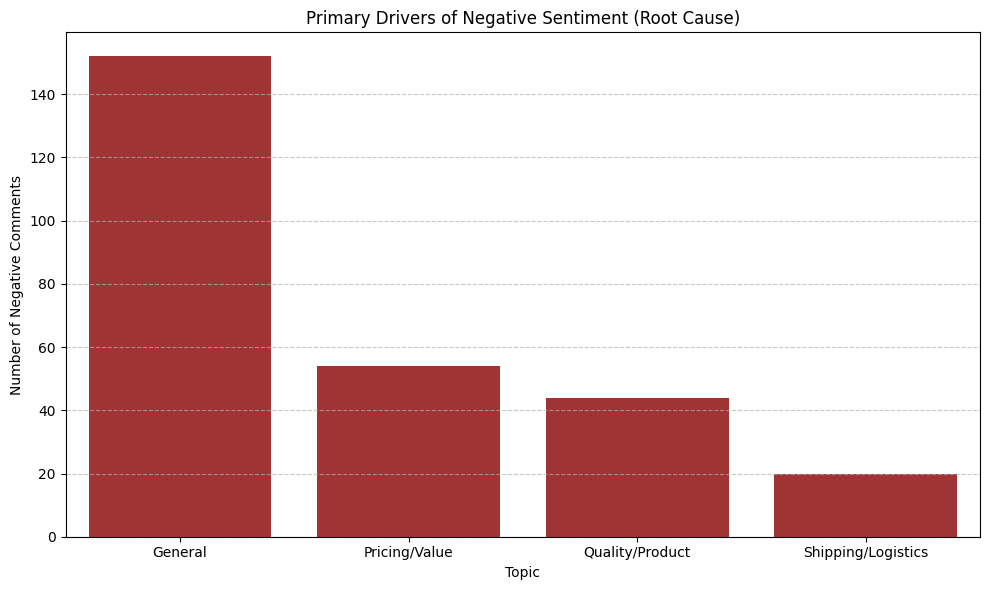

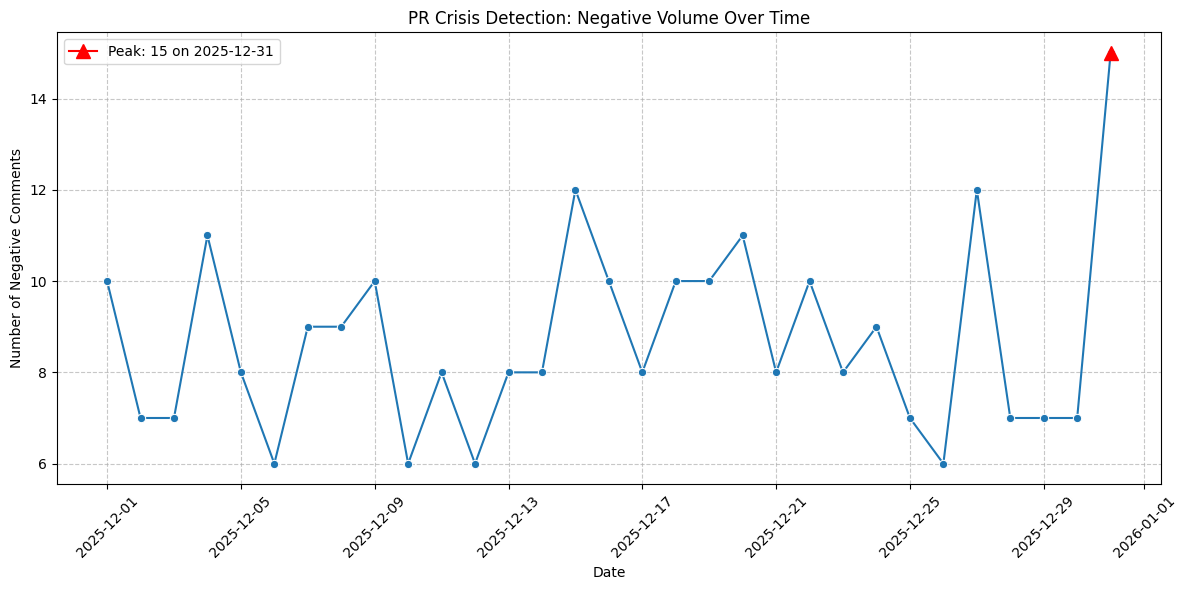

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for negative comments
negative_comments_df = df[df['Sentiment'] == 'Negative']

# Root Cause Analysis: Negative Sentiment Count by Topic
negative_sentiment_by_topic = negative_comments_df.groupby('Topic').size().reset_index(name='Count')

plt.figure(figsize=(10, 6))
sns.barplot(x='Topic', y='Count', data=negative_sentiment_by_topic, color='FireBrick')
plt.title('Primary Drivers of Negative Sentiment (Root Cause)')
plt.xlabel('Topic')
plt.ylabel('Number of Negative Comments')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Crisis Timeline: Count of Negative comments over time (Date)
negative_comments_trend = negative_comments_df.groupby('Date').size().reset_index(name='Count')

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Count', data=negative_comments_trend, marker='o')

# Add marker for the highest peak
highest_peak = negative_comments_trend.loc[negative_comments_trend['Count'].idxmax()]
plt.plot(highest_peak['Date'], highest_peak['Count'], marker='^', markersize=10, color='red', label=f'Peak: {highest_peak['Count']} on {highest_peak['Date'].strftime('%Y-%m-%d')}')

plt.title('PR Crisis Detection: Negative Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Negative Comments')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()